In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize=(15,10));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        # plt.imshow(img[:,:,::-1]);
        plt.imshow(img);
    plt.show()

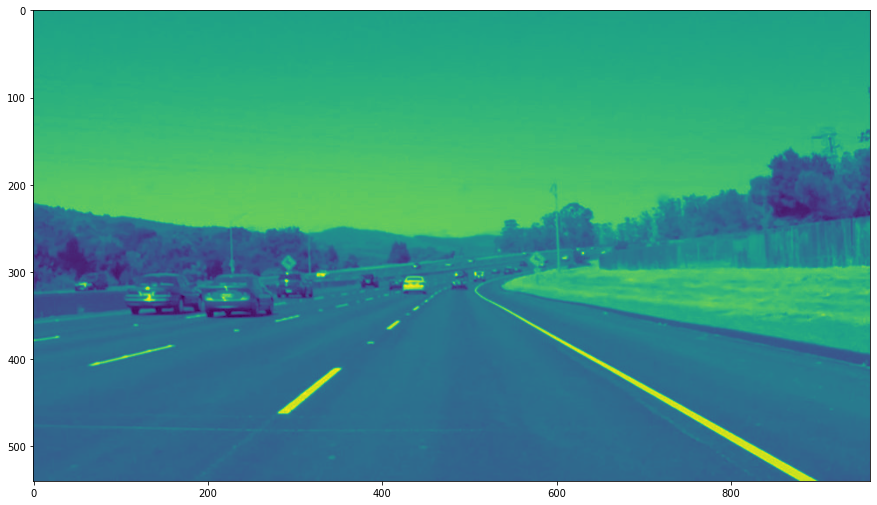

In [13]:
img = cv2.imread("Test/test_images/solidWhiteCurve.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#gray_img = cv2.imread('Test/test_images/solidWhiteCurve.jpg', cv2.IMREAD_GRAYSCALE)
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
imshow(gray_img)

In [14]:
def imshow(img):
    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), cmap='gray')

In [32]:
def image_preprocess(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    g_blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(g_blur, 50, 150) 
    _, thres_img = cv2.threshold(canny, 70, 255, cv2.THRESH_BINARY)
    return thres_img

In [38]:
preprocessed_img= image_preprocess(img)

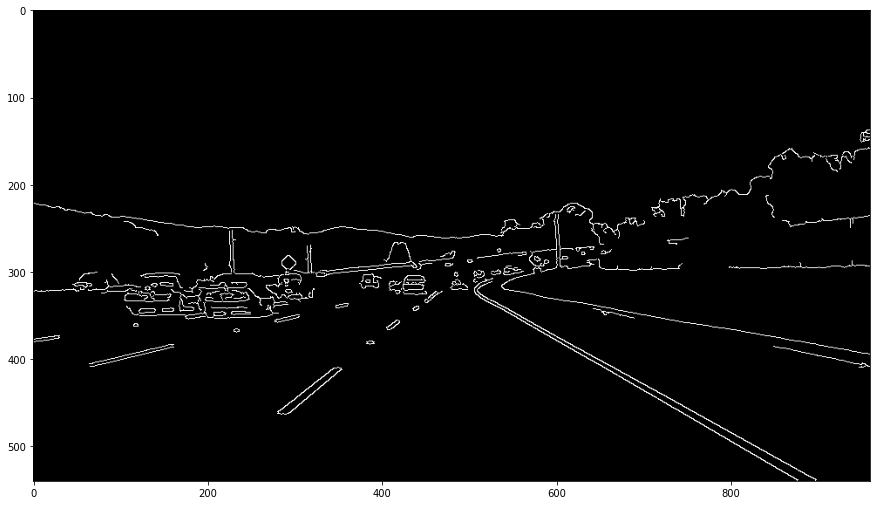

In [39]:
imshow(preprocessed_img)

In [40]:
#Shapes of the img
height, width, _ = img.shape
print (height, width)

540 960


In [ ]:
roi = preprocessed_img [340: 720, 500:800]

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-1hfhc_rd\opencv\modules\imgproc\src\hough.cpp:120: error: (-215:Assertion failed) img.type() == CV_8UC1 in function 'cv::HoughLinesStandard'


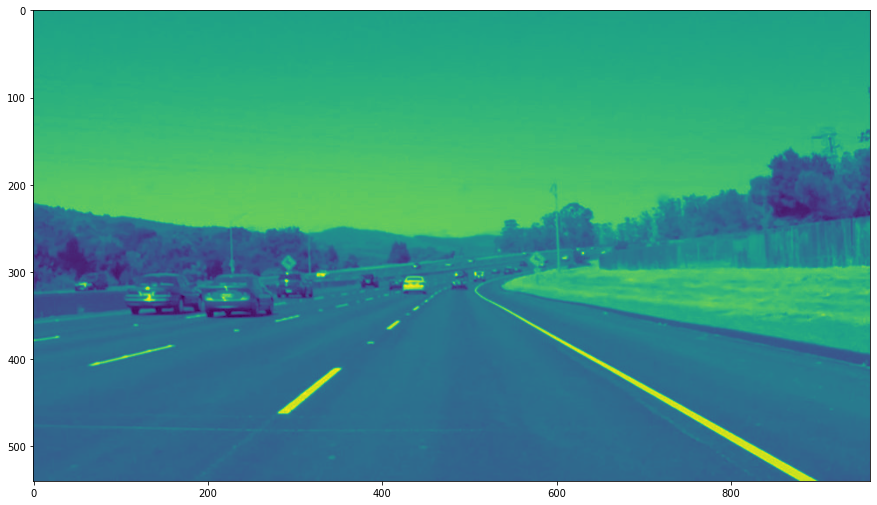

In [4]:
img = cv2.imread("Test/test_images/solidWhiteCurve.jpg")
img = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
imshow(gray_img)


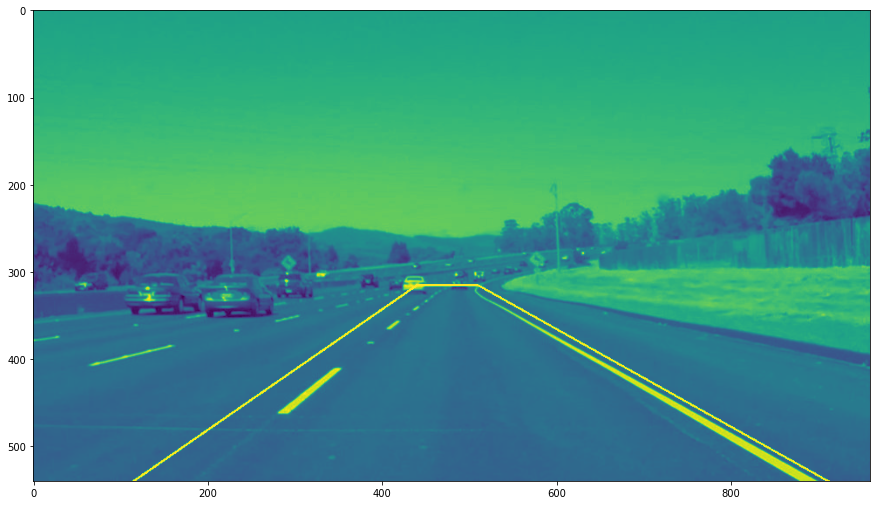

In [5]:
pts = np.array([[
    [100, 550],
    [930, 550],
    [510, 315],
    [440, 315],
]],np.int32)



  
pts = pts.reshape((-1, 1, 2))
  
isClosed = True
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.polylines() method
# Draw a Blue polygon with 
# thickness of 1 px
cropped = cv2.polylines(gray_img, [pts], 
                      isClosed, color, thickness)

imshow(cropped)

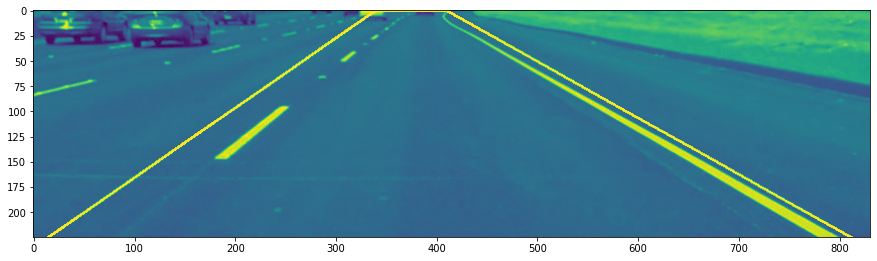

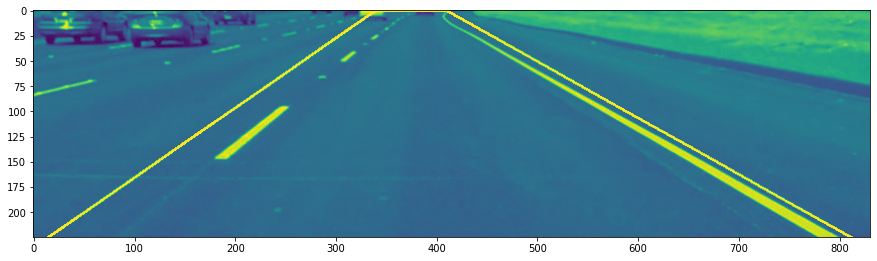

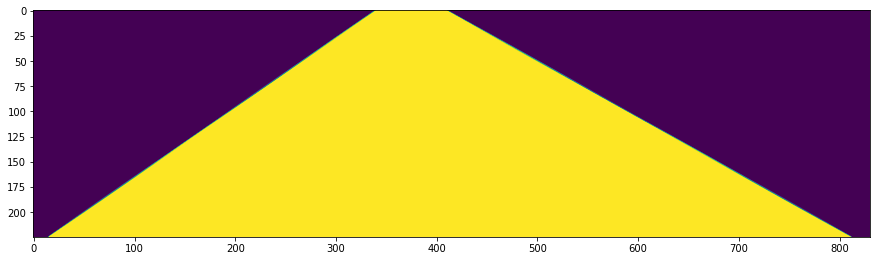

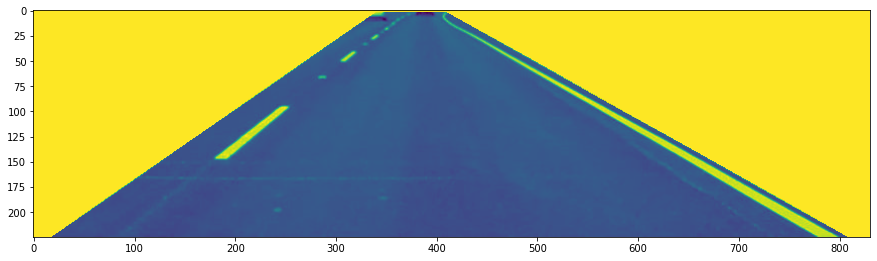

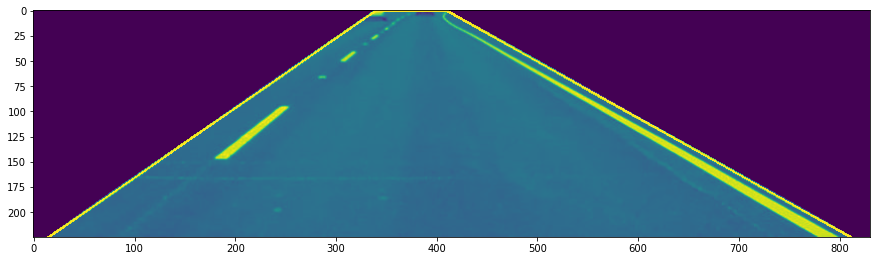

In [6]:
rect = cv2.boundingRect(pts)
x,y,w,h = rect
cropped = cropped[y:y+h, x:x+w].copy()
imshow(cropped)

# (2) make mask
pts = pts - pts.min(axis=0)

mask = np.zeros(cropped.shape[:2], np.uint8)
cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

## (3) do bit-op
dst = cv2.bitwise_and(cropped, cropped, mask=mask)

## (4) add the white background
bg = np.ones_like(cropped, np.uint8)*255
cv2.bitwise_not(bg,bg, mask=mask)
dst2 = bg+ dst


imshow(cropped)
imshow(mask)
imshow(dst2)
imshow(dst)



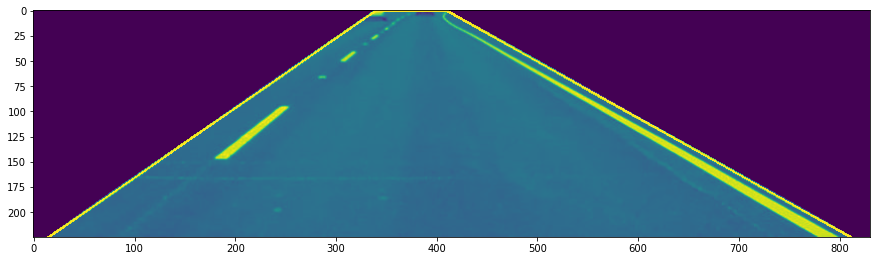

In [7]:
blur = cv2.medianBlur(dst,21)
_,thresh = cv2.threshold(blur,128,255,cv2.THRESH_BINARY)

cv2.imshow("Image Name", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [8]:
thr = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)
cv2.imshow("Image Name", thr)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [9]:
edges = cv2.Canny(thresh, 1, 255, apertureSize=3)
cv2.imshow("Image Name", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [10]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 80)


In [17]:
img = img.copy()

for line in lines:
    for r, theta in line:
        # Stores the value of cos(theta) in a
        a = np.cos(theta)

        # Stores the value of sin(theta) in b
        b = np.sin(theta)

        # x0 stores the value rcos(theta)
        x0 = a * r

        # y0 stores the value rsin(theta)
        y0 = b * r

        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 1000 * (-b))

        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 1000 * (a))

        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 1000 * (-b))

        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 1000 * (a))

        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
        # (0,0,255) denotes the colour of the line to be
        # drawn. In this case, it is red.
        cv2.line(img, (x1+400, y1+485), (x2+400, y2+485), (0, 0, 255), 2)

In [18]:
cv2.imshow("Image Name", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1